In [1]:
import sys
sys.path.insert(0, '/home/lcastellazzi/DL-SCA')

In [2]:
import trsfile
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import modules.preprocessing as prep
# from modules.nicv import foo

In [3]:
path = '/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz + Resampled at 168MHz.trs'
traces, labels = prep.produce_labeled_traceset(path,
                                               target='SBO',
                                               metadata=True,
                                               plaintext_list=None,
                                               key=None)

100%|██████████| 50000/50000 [00:21<00:00, 2313.08it/s]


In [4]:
##################### AISY-like implementation #####################

def tmp(traces, labels, byte_idx):
    num_traces = len(traces)
    tr_len = len(traces[0])
    n_labels = 256
    mean_t_given_x_matrix = np.empty((n_labels, tr_len))
    
    for i in range(n_labels):
        t_with_x = []
        for j in range(num_traces):
            if labels[j][byte_idx] == i:
                t_with_x.append(j)
        
        for j in range(tr_len):
            tr_values = np.empty((len(t_with_x)))
            for k in range(len(t_with_x)):
                tr_values[k] = traces[t_with_x[k]][j]
            if len(tr_values) > 0:
                mean_t_given_x_matrix[i, j] = np.mean(tr_values)
            else:
                mean_t_given_x_matrix[i, j] = 0
        
    nicv_values_over_time = np.empty(tr_len)
    for z in range(tr_len):
        nicv_values_over_time[z] = np.var(mean_t_given_x_matrix[:, z]) / np.var(traces[:][z])
    
    return nicv_values_over_time

In [5]:
res = tmp(traces, labels, 0)

In [6]:
from modules.nicv import nicv

In [8]:
res2 = nicv(np.array(traces), np.array(labels), 0)

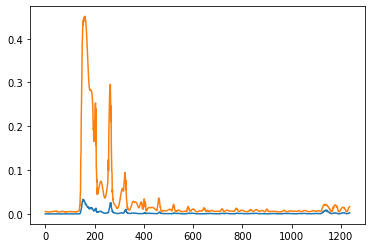

In [9]:
plt.plot(res)
plt.plot(res2)

In [10]:
:

numpy.ndarray

100%|██████████| 50000/50000 [00:01<00:00, 27362.45it/s]


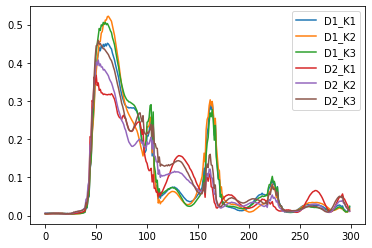

In [13]:
paths = ['/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D1-K2_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D1-K3_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D2-K1_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D2-K2_50k_500MHz + Resampled at 168MHz.trs', 
         '/prj/side_channel/PinataTraces/CURR/D2-K3_50k_500MHz + Resampled at 168MHz.trs']

plot_labels = ['D1_K1', 
               'D1_K2', 
               'D1_K3', 
               'D2_K1', 
               'D2_K2', 
               'D2_K3']

for i, path in enumerate(paths):
    traces, labels = prep.produce_labeled_traceset(path,
                                                   target='SBO',
                                                   metadata=True,
                                                   plaintext_list=None,
                                                   key=None)
    res = nicv(traces, labels, 0)
    plt.plot(res[100:400], label=plot_labels[i])

plt.legend()    
plt.show()

100%|██████████| 50000/50000 [00:01<00:00, 27529.22it/s]


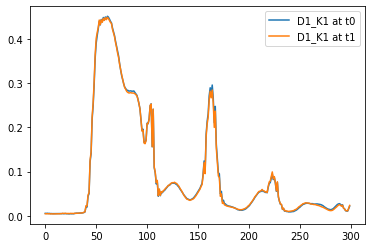

In [14]:
paths = ['/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz (NICV) + Resampled at 168MHz.trs']

for i, path in enumerate(paths):
    traces, labels = prep.produce_labeled_traceset(path,
                                                   target='SBO',
                                                   metadata=True,
                                                   plaintext_list=None,
                                                   key=None)
    res =  nicv(traces, labels, 0)
    plt.plot(res[100:400], label=f'D1_K1 at t{i}')

plt.legend()
plt.show()

100%|██████████| 50000/50000 [00:01<00:00, 27739.68it/s]


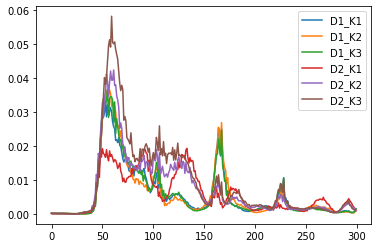

In [15]:
paths = ['/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D1-K2_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D1-K3_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D2-K1_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D2-K2_50k_500MHz + Resampled at 168MHz.trs', 
         '/prj/side_channel/PinataTraces/CURR/D2-K3_50k_500MHz + Resampled at 168MHz.trs']

plot_labels = ['D1_K1', 
               'D1_K2', 
               'D1_K3', 
               'D2_K1', 
               'D2_K2', 
               'D2_K3']

for i, path in enumerate(paths):
    traces, labels = prep.produce_labeled_traceset(path,
                                                   target='SBO',
                                                   metadata=True,
                                                   plaintext_list=None,
                                                   key=None)
    res = tmp(traces, labels, 0)
    plt.plot(res[100:400], label=plot_labels[i])

plt.legend()    
plt.show()

100%|██████████| 50000/50000 [00:01<00:00, 27807.86it/s]


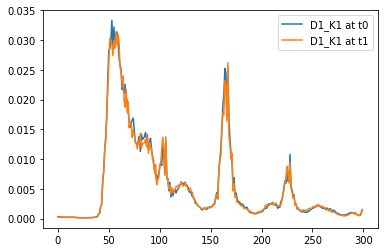

In [16]:
paths = ['/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz + Resampled at 168MHz.trs',
         '/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz (NICV) + Resampled at 168MHz.trs']

for i, path in enumerate(paths):
    traces, labels = prep.produce_labeled_traceset(path,
                                                   target='SBO',
                                                   metadata=True,
                                                   plaintext_list=None,
                                                   key=None)
    res =  tmp(traces, labels, 0)
    plt.plot(res[100:400], label=f'D1_K1 at t{i}')

plt.legend()
plt.show()